#1 Реализация алгоритма

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import norm
from copy import deepcopy

In [2]:
def Kmeans(X, n_centers = 2, eps = 0.001,random_init = True, max_iter = 300):
    """
    Разбивает множество объектов X на кластеры
    Параметры: 
            X : numpy.ndarray
                Множество объектов которые нужно разбить на кластеры
            n_centers : int, default = 2
                Количество кластеров
            eps : float, default = 0.001
                Величина, которую не должны превышать изменения центров для окончания работы алгоритма
            random_init : bool, default = True
                Отвечает за стратегию инициализации точек.
                При random_init == True выбор центров осуществляется случайно из точек множества
                При random_init == False первым цетром выбирается самая дальняя точка от начала координат, далее 
                i-aя выбирается как самая дальняя от предыдущех i точек по сумме расстояний
            max_iter : int, default = 300
                Алгоритм прекращается при совершении max_iter итераций цикла
    Возвращает:
            answers : numpy.ndarray
            Одномерный массив размера X.shape[0] где answer[i]  - номер кластера, которому пренадлежит X[i]
    """
    if random_init:
        centers = X[np.random.choice(X.shape[0],n_centers,replace=False)]
    else:
        centers = np.zeros((n_centers, X.shape[1]))
        centers[0] = X[np.random.randint(0, X.shape[0] + 1),:]
        for i in range(n_centers):
            max_sum = 0
            for x in X:
                if i == 0:
                    cur_sum = norm(x, ord=1)
                else:
                    cur_sum = sum([norm(centers[j] - x, ord=1) for j in range(i)]) 
                if cur_sum > max_sum and not (centers == x).any():
                    new_center = x[:]
                    max_sum = cur_sum
            centers[i] = new_center[:]
    answers = np.zeros(X.shape[0])
    centers_change = np.ones(n_centers)
    n = 0
    centers_1 =centers
    while((centers_change >= eps).any()) or max_iter == n:
        answers = np.fromiter((np.argmin(((centers - x) ** 2).sum(axis=1)) for x in X), float)
        new_centers = deepcopy(centers)
        for i in range(centers.shape[0]):
            if (answers[answers == i].shape[0]):
                new_centers[i] = np.array([X[j] for j in range(X.shape[0]) if answers[j] == i]).sum(axis=0) / answers[answers == i].shape[0]
                centers_change[i] = norm(centers[i] - new_centers[i], ord = 2)
            else:
                centers_change[i] = 0
        centers = new_centers
        n += 1
    return answers
                

#2 Результаты работы на выборках различной структуры

##2.1 Объявление функций генарации множеств объектов с двумя признаками

In [3]:
def generate_blobs(n_centers = 2,n_samples = 100, noise=1):
    X = np.zeros((n_samples, 2))
    for i in range(n_centers):
        X[i] += 0.1 + 0.8 * (i / n_centers)
    for i in range(n_centers, n_samples):
        X[i] += X[i % n_centers] + noise * np.random.rand(2) / 10
    return X

def generate_plane(n_samples=300):
    return np.random.rand(n_samples, 2)

def generate_circles(n_sample_div4 = 75, noise = 1):
    X = np.zeros((n_sample_div4 * 4, 2))
    x = np.linspace(-1, 1, n_sample_div4)
    X[:n_sample_div4, :] += np.array([x, (1-x**2)**(1/2)]).T + noise * np.random.rand(n_sample_div4, 2) / 5
    X[n_sample_div4:2*n_sample_div4, :] += np.array([x, -(1-x**2)**(1/2)]).T + noise * np.random.rand(n_sample_div4, 2) / 5
    x = np.linspace(-2, 2, n_sample_div4)
    X[2*n_sample_div4:3*n_sample_div4, :] += np.array([x, -(4-x**2)**(1/2)]).T + noise * np.random.rand(n_sample_div4, 2) / 5
    X[3*n_sample_div4:, :] += np.array([x, (4-x**2)**(1/2)]).T + noise * np.random.rand(n_sample_div4, 2) / 5
    
    return X

def generate_lines(per_line_samples = 150,lines = 2,  noise = 1):
    X = np.zeros((per_line_samples * lines, 2))
    for i in range(lines):
        X[i * per_line_samples:(i + 1) * per_line_samples, :] += np.array([np.linspace(0,1,per_line_samples), 
        np.full(per_line_samples,1 / lines * i)]).T + noise * np.random.rand(per_line_samples, 2) / 40
        
    return X

##2.2 Применение алгоритма

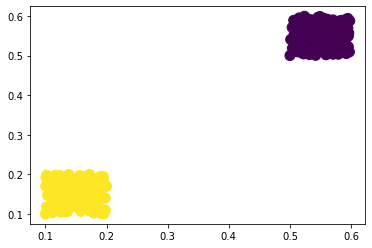

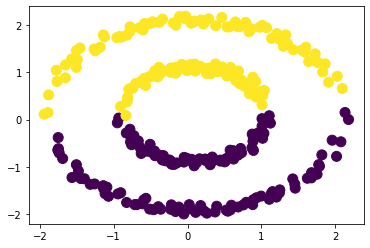

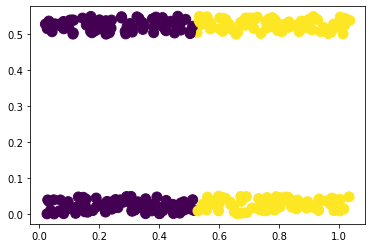

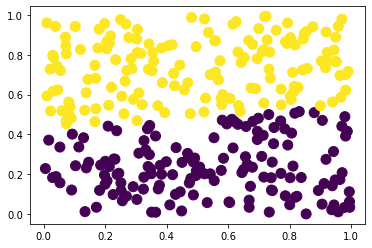

In [4]:
#n_centers = 2
generators = [[generate_blobs, [2, 300, 1]],
              [generate_circles, [75, 1]],
              [generate_lines, [150,2, 2]],
              [generate_plane, [300]]]
for generator in generators:
    X = generator[0](*generator[1])
    plt.figure()
    answers = Kmeans(X, 2)
    plt.scatter(X[:,0], X[:,1],100, c=answers)
    plt.show()

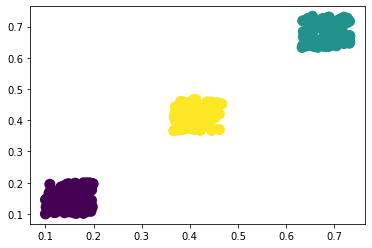

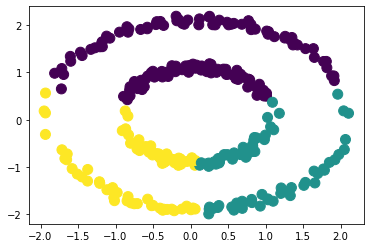

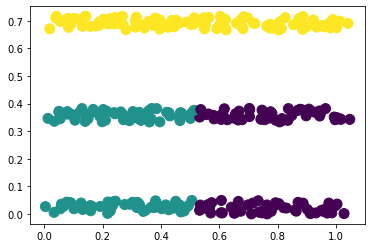

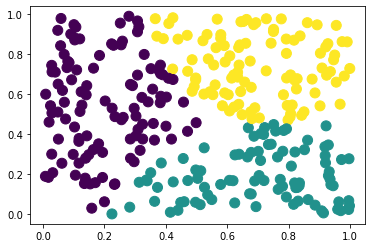

In [7]:
#n_centers = 3
generators = [[generate_blobs, [3, 300, 1]],
              [generate_circles, [75, 1]],
              [generate_lines, [100, 3, 2]],
              [generate_plane, [300]]]
for generator in generators:
    X = generator[0](*generator[1])
    plt.figure()
    answers = Kmeans(X, 3)
    plt.scatter(X[:,0], X[:,1],100, c=answers)
    plt.show()

#3 Выводы

Как и было сказано на лекции, алгоритм KMeans дает результат соотвествующий действительности на равномощных множествах шаровой формы, вполне логичный результат для плотного равномерного скопления точек. 
Не подходит для кластеризации множеств, имеющих 'cлоевую' структуру и растянутых по плоскости.